<center><h1>US Climate Change Analysis Using Window Functions</h1></center>

This SQL project utilizes a variety of window functions to engineer multiple features in order to gain additional insight off of a table that only contains a state, year, and average temperature. The results of this project display the highest and lowest average temperatures for each state based on 125 years of data. As one will see, the features in this project are driven by a PARTITION function which is similar to a GROUP BY function, but in the context of a particular window, allowing the rows to retain their separate identities. Unbound ranges were used to aggregate a series of rows that were both before and after each partitioned row in order to get a full viewed computation such as the highest and lowest value in a particular subset.

In [ ]:
SELECT 
  -- Now the first row for each state represents the warmest year on record 
  NTILE(4) OVER(
    PARTITION BY state
    ORDER BY tempf DESC -- change this to ASC if coldest temperature first is desired
  ) AS quartile,
  state,
  year,
  tempf,
  -- Running average temperature for each year by state
  AVG(tempf) OVER (
    PARTITION BY state
    ORDER BY year
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS running_avg_temp,
  -- Lowest temperature for each year by state
  FIRST_VALUE(tempf) OVER (
    PARTITION BY state
    ORDER BY tempf
  ) AS lowest_temp,
  -- Highest temperature for each year by state
  LAST_VALUE(tempf) OVER (
    PARTITION BY state
    ORDER BY tempf
    RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING
  ) AS highest_temp,
  -- Change in temperature from the previous year
  tempf - LAG(tempf, 1, 0) OVER(
    PARTITION BY state
    ORDER BY year ASC
  ) AS change_in_temp,
  -- Assigns a rank to each row that displays how cold that year was compared to all other years, where rank 1 = coldest year
  RANK() OVER(
    PARTITION BY state
    ORDER BY tempf ASC
  ) AS coldest_rank,
  -- This is essentially the opposite rank of the coldest year on record for each state where 1 is the warmest 
  RANK() OVER(
    PARTITION BY state
    ORDER BY tempf DESC
  ) AS warmest_rank
FROM state_climate;

#### Preview of the first few rows, the same pattern is repeated for all states where the warmest rank is at the top:
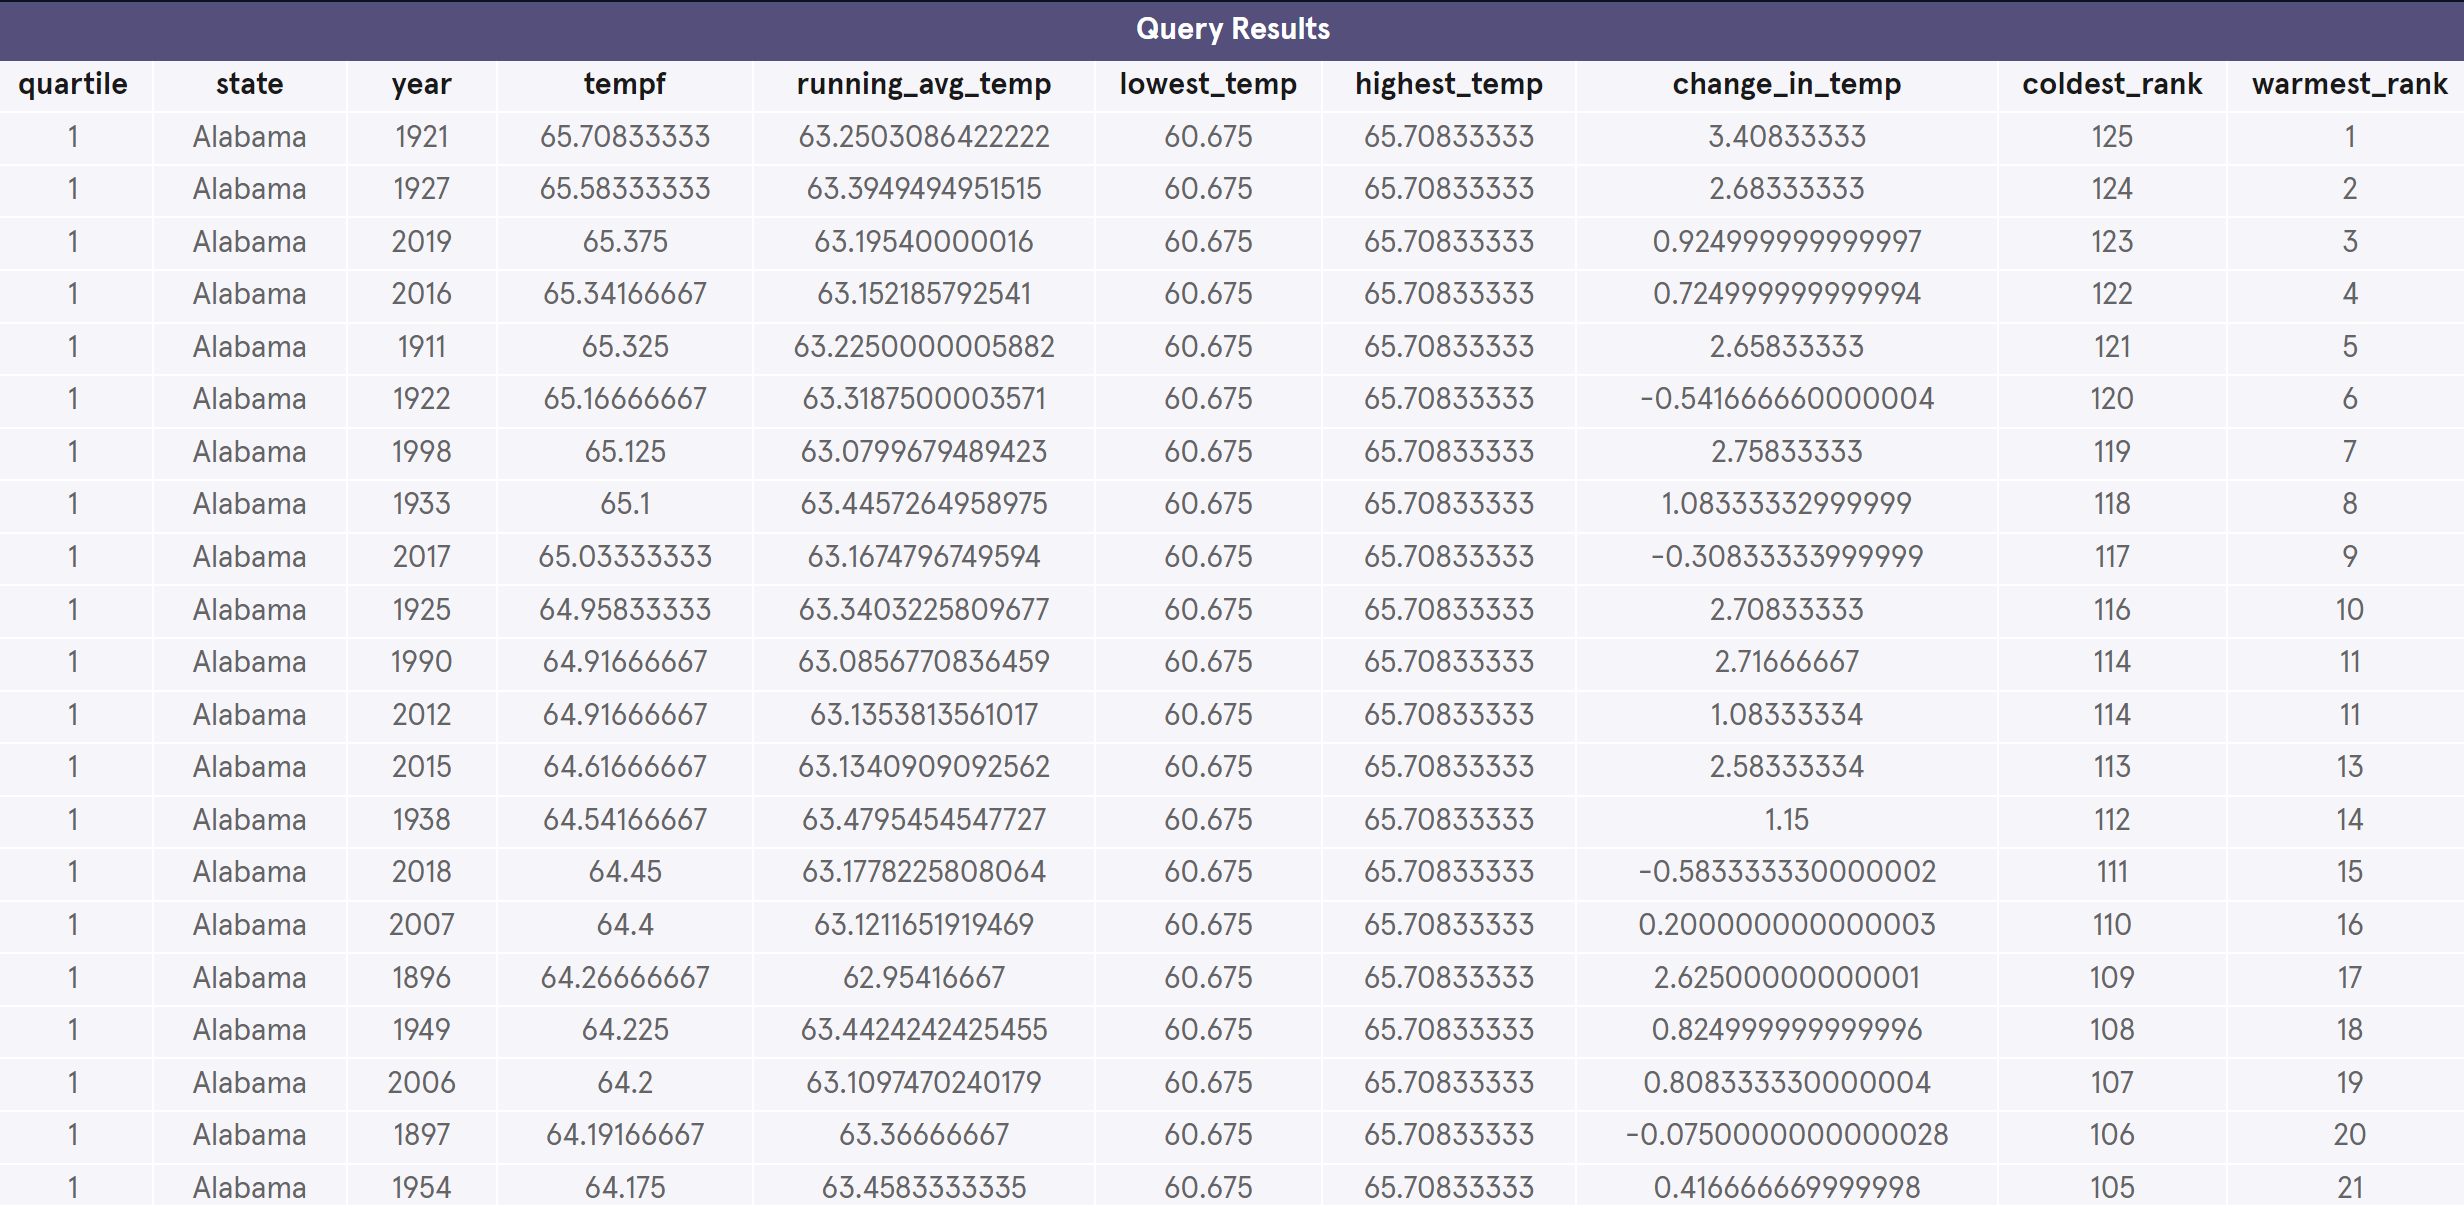